<a href="https://colab.research.google.com/github/CAVASOL/aiffel_quest/blob/main/DL_quest/cv_with_dl/2_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multi Layer Perceptron

**학습 목표**

* Multi-Layer Perceptron(MLP) 구조를 설명할 수 있습니다.
* MLP를 이용해서 이미지 분류를 어떻게 할 수 있는지를 설명하고, 코드를 작성할 수 있습니다.
* 이미지 데이터를 분석할 때 MLP가 가진 한계점을 설명할 수 있습니다.

**Q. 이미지 속의 정보는 어떤 특징을 가지고 있나요?**
```
이미지 데이터 안의 정보는 하나의 픽셀 자체가 아닌 주변의 여러 픽셀과의 관계를 통해서 드러납니다. 특정 픽셀과 주변 픽셀과 유사성을 통해 이미지의 색, 형태, 질감 등을 파악할 수 있습니다.
```

**Q. 컴퓨터 비전의 각 태스크는 어떻게 구분할 수 있나요?**
```
Single Object인지 Multiple Object인지에 따라 구분할 수 있습니다. Single Object를 다루는 태스크에는 Classification과 Localization이 있고, Multiple Object를 다루는 태스크는 Object Detection과 Instance Segmentation이 있습니다.
```

**Q. Classification과 Localization를 설명해 보세요.**
```
Classification: 1개의 object의 class를 예측하는 태스크입니다. Localization: object의 위치를 찾아내는 태스크로, Bounding Box를 통해 위치를 지정합니다.
```
>* 이미지 Classification (이미지 분류): 이미지 내의 주요 객체나 패턴을 식별하여 이미지를 사전 정의된 클래스 또는 범주로 분류하는 작업입니다. 주로 "무엇(What)"을 식별하는 작업으로 생각할 수 있습니다. 예를 들어, 개 이미지와 고양이 이미지를 구별하거나, 과일 이미지를 사과, 바나나, 오렌지 등으로 분류하는 것이 이미지 분류의 예입니다. 일반적으로 Convolutional Neural Networks (CNNs)와 같은 딥러닝 모델이 이미지 분류 작업에 사용됩니다.
>
>
>* 객체 Localization (객체 위치 파악): 이미지에서 객체의 위치와 크기를 파악하는 작업입니다. 이것은 "어디(Where)"에 해당하는 작업으로 생각할 수 있습니다. 객체 Localization은 주로 경계 상자(bounding box)를 이용하여 객체의 위치를 지정합니다. 따라서 객체를 감싸는 사각형 영역을 정의하고, 이 경계 상자의 위치와 크기를 추정하는 것이 중요합니다. 객체 Localization과 Classification을 함께 수행하는 모델은 "객체 검출(Object Detection)" 모델이라고 불립니다. 예를 들어, 자동차 검출 작업에서 이미지에 있는 자동차의 위치와 클래스를 동시에 파악하는 것이 객체 검출의 예입니다. 객체 검출에는 다양한 딥러닝 아키텍처, 예를 들어 Faster R-CNN, YOLO(You Only Look Once), SSD(Single Shot MultiBox Detector) 등이 사용됩니다.


**Q. Object Detection을 설명해 보세요.**
```
Object Detection는 Bounding Box로 위치를 지정하고, 각 Bounding Box 안의 obejct를 classification을 하는 것입니다.
Object Detection = Bounding Box Regression (Localization) + Multi-Labeled Classification
```

**Q. Segmentation을 설명해 보세요.**
```
Segmentation은 픽셀 수준에서의 의미를 찾는 태스크입니다. Segmentation은 이미지를 픽셀 단위로 분해하고 픽셀의 class를 분류하는 Semantic Segmentation와 픽셀이 어떤 개별 객체(개체, Instance)로 구분되는지 분류하는 Instance Segmentation로 구분할 수 있습니다.
```

**Q. MLP 모델 구조를 보면 여러 개의 hidden layer로 이뤄져 있는 것을 알 수 있습니다. 이것들은 Representation learning을 수행한다고 말할 수 있습니다.  이때 Representation learning은 무엇을 의미하고, 또 다른 말로 어떻게 부를 수 있는지 설명해 보세요.**

```
Representation learning은 Representation을 통해서 원래 데이터가 존재하는 공간을 변경하는 것을 의미합니다. 정리해서 설명하자면, Representation learning은 Training 하는 과정에서 parameter를 계속해서 변형하여 task를 수행하는 데에 가장 적합한 공간구조를 Representation을 합니다. Representation learning은 Pattern Extractor(패턴 추출기) Feature Extractor라고 부릅니다. 이는 MLP 모델이 가진 큰 장점이라고 말할 수 있으며, 어떻게 하면 Feature Extractor를 잘 만들 수 있을까가 딥러닝 모델을 만들 때 핵심이 됩니다.
```
>Representation learning(표현 학습)은 기계 학습 및 딥러닝 분야에서 중요한 개념 중 하나이며, 데이터로부터 유용하고 정보-rich한 표현(또는 피처)을 학습하는 과정을 가리킵니다. 이러한 표현은 원시 데이터를 고차원 공간에서 저차원, 의미 있는 공간으로 변환하여 데이터의 특징, 패턴, 구조를 더 잘 파악할 수 있도록 도와줍니다. Representation learning은 다양한 기계 학습 작업에서 효과적으로 사용됩니다.
>
>Representation learning에 대한 다른 용어 및 설명은 다음과 같습니다.
>* Feature Learning (피처 학습): Representation learning은 종종 "feature learning"이라고도 불립니다. 이것은 원시 데이터에서 피처를 추출하고, 데이터의 표현을 개선하는 과정을 강조합니다.
>* 표현(representation): 표현은 원시 데이터를 표현하기 위한 중간 형태로, 일반적으로 고차원 데이터를 저차원 벡터로 나타냅니다. 이러한 표현은 데이터의 의미와 구조를 포함하며, 다른 데이터 간의 유사성 및 차이를 나타내는 중요한 특징을 갖습니다.
>* 표현 학습 모델: 다층 퍼셉트론(MLP), 컨볼루션 신경망(CNN), 순환 신경망(RNN), 오토인코더(Autoencoder) 및 변이형 오토인코더(Variational Autoencoder, VAE)와 같은 신경망 구조는 표현 학습 모델의 한 예입니다. 이러한 모델은 데이터로부터 표현을 학습하고, 학습된 표현을 특정 작업에 활용할 수 있습니다.
>
>Representation learning은 다음과 같은 이점을 제공합니다.
>* 데이터 압축: 고차원 데이터를 저차원으로 효과적으로 압축하여 저장 및 처리 효율을 향상시킵니다.
>* 특징 추출: 데이터의 중요한 특징을 추출하고, 분류, 클러스터링 및 기타 기계 학습 작업을 위한 입력으로 사용할 수 있습니다.
>* 고차원 데이터의 시각화: 저차원 표현은 고차원 데이터를 시각화하는 데 유용하며, 데이터 간의 관계를 더 잘 이해할 수 있습니다.

**Q. MLP 모델 구조의 핵심을 한 줄로 요약해 봅시다.**
```
MLP 모델 구조의 핵심은 데이터 안에 숨겨진 패턴을 Representation을 통해서 찾는 것
```

**Q. MLP 모델로 이미지 분류를 하기 위해서는 2차원의 이미지를 1차원으로 변형해야 했습니다. 이때, 발생하는 문제점은 어떤 것인가요?**
```
하나의 픽셀의 의미는 주변 픽셀과의 관계를 통해서 결정되기 때문에 2차원 이미지를 1차원의 구조로 바꾸면 숨겨져 있던 패턴의 정보가 사라집니다.
```

### MLP 모델로 이미지 분류해보기

**MNIST 데이터 살펴보기**

In [ ]:
import sys
import tensorflow as tf
import numpy as np

(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

print(X_train.shape)
print(Y_train.shape)
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

(60000, 28, 28)
(60000,)
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


5


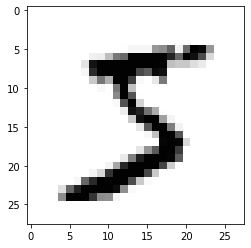

In [ ]:
import matplotlib.pyplot as plt
print(Y_train[0])
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [ ]:
# for x in X_train[0]:
#     for i in x:
#         sys.stdout.write('%d\t' % i)
#     sys.stdout.write('\n')

**MLP 구조 만들기**

MLP(Multi Layer Perceptron)의 입력 데이터는 기본적으로 `벡터 형태`입니다. X_train은 28 x 28 크기의 MNIST 데이터 60,000개가 모여 있는 배열이기 때문에, 각각의 데이터를 (28, 28) 크기의 행렬(2차원)에서 길이가 28x28=784인 벡터(1차원)로 변형시켜야 합니다. X_test에 포함된 데이터도 reshape() 함수를 사용하여 크기를 바꿔줍시다.

In [ ]:
# MLP 구조에 적절한 input의 형태로 변형하기
## reshape()을 사용하여 2차원의 데이터를 1차원으로 변형
## 1차원으로 변형함과 동시에 Normalization

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') # 28 x 28= 784
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
# Label 값을 One-hot encoding 하기
# Multi-Class Classfication이므로 keras.utils.to_categorical을 사용

Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [ ]:
print(Y_train.shape)
print(Y_test.shape)
print(Y_train[0])

(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


본격적으로 MLP 모델을 만들어봅시다. 모델을 만드는 여러 가지 방법이 있지만 여기서는 `Functional API`로 만들겠습니다. 이번에 구현할 모델은 input layer와 두 개의 hidden layer, 그리고 output layer로 구성되어 있습니다. 특히 output layer는 특별한 task를 수행하는데, 이 경우에는 10개의 class를 분류 (multi-class classification)하는 것입니다. 만약 output layer의 perceptron이 회귀 문제에서와 같이 실수 출력 값을 가진다면 수행하고자 하는 분류 task에 적절하지 않습니다. 왜냐 하면 분류 문제에서 label 값은 one-hot vector로 인코딩되고, 이것은 특정 클래스에 속할 확률이 1이라고 해석될 수 있기 때문입니다. 그러므로 10개의 perceptron에서 나온 출력을 확률 값으로 만들기 위해 활성화 함수로 softmax를 사용해야 합니다.

In [ ]:
input_layer = tf.keras.layers.Input(shape=(784,))
x = tf.keras.layers.Dense(512, activation='relu')(input_layer)
x = tf.keras.layers.Dense(512, activation='relu')(x)
out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

**MLP 모델 Training 하기**

In [ ]:
# validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=1000, verbose=1)
print(history.history.keys())

Epoch 1/30
48/48 [==============================] - 2s 10ms/step - loss: 15.3634 - categorical_accuracy: 0.7808 - val_loss: 1.3344 - val_categorical_accuracy: 0.9178
Epoch 2/30
48/48 [==============================] - 0s 5ms/step - loss: 0.7861 - categorical_accuracy: 0.9305 - val_loss: 0.7593 - val_categorical_accuracy: 0.9297
Epoch 3/30
48/48 [==============================] - 0s 5ms/step - loss: 0.3757 - categorical_accuracy: 0.9512 - val_loss: 0.6071 - val_categorical_accuracy: 0.9391
Epoch 4/30
48/48 [==============================] - 0s 5ms/step - loss: 0.1939 - categorical_accuracy: 0.9685 - val_loss: 0.5458 - val_categorical_accuracy: 0.9424
Epoch 5/30
48/48 [==============================] - 0s 5ms/step - loss: 0.0991 - categorical_accuracy: 0.9809 - val_loss: 0.5197 - val_categorical_accuracy: 0.9449
Epoch 6/30
48/48 [==============================] - 0s 5ms/step - loss: 0.0544 - categorical_accuracy: 0.9880 - val_loss: 0.5105 - val_categorical_accuracy: 0.9467
Epoch 7/30
48/

In [ ]:
# Training loss 확인하기

loss = history.history['loss']
print(loss)

[15.363444328308105, 0.7861288785934448, 0.3757259249687195, 0.19390717148780823, 0.09914762526750565, 0.05440088361501694, 0.028130080550909042, 0.013527690432965755, 0.005665619391947985, 0.0022280793637037277, 0.0010351873934268951, 0.0006165754166431725, 0.0004982869722880423, 0.00043562109931372106, 0.0003885479236487299, 0.0003516232827678323, 0.00032164924778044224, 0.0002968627668451518, 0.00027509109349921346, 0.00025637756334617734, 0.00023992151545826346, 0.00022467965027317405, 0.00021095972624607384, 0.00019910611445084214, 0.00018781269318424165, 0.00017789511184673756, 0.00016815064009279013, 0.00015993427950888872, 0.00015220462228171527, 0.00014493390335701406]


In [ ]:
# Q. Validation loss를 확인해 보세요.

val_loss = history.history['val_loss']
print("Validation Loss:", val_loss)

Validation Loss: [1.3344312906265259, 0.7593138217926025, 0.6070867776870728, 0.5457627773284912, 0.5197417140007019, 0.5104641318321228, 0.49201053380966187, 0.48690131306648254, 0.48038625717163086, 0.47686144709587097, 0.47586336731910706, 0.47565072774887085, 0.4752471148967743, 0.47464892268180847, 0.4744149446487427, 0.47454655170440674, 0.47416743636131287, 0.47423383593559265, 0.47421830892562866, 0.47370287775993347, 0.4738098084926605, 0.4739762842655182, 0.4737704396247864, 0.47363370656967163, 0.47374227643013, 0.4734947085380554, 0.4735689163208008, 0.4734974503517151, 0.4732329845428467, 0.4732285439968109]


**학습된 모델의 성능 확인하기**

In [ ]:
# Test 데이터를 통해서 정확도 확인하기

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.4157 - categorical_accuracy: 0.9524

 Test Accuracy: 0.9524


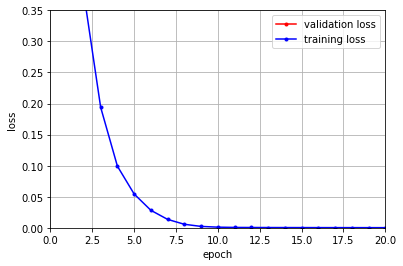

In [ ]:
x_len = np.arange(len(val_loss))
plt.plot(x_len, val_loss, marker='.', c="red", label='validation loss')
plt.plot(x_len, loss, marker='.', c="blue", label='training loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

**Modified Model**

In [ ]:
input_layer = tf.keras.layers.Input(shape=(784,))
x = tf.keras.layers.Dense(1024, activation='relu')(input_layer)
x = tf.keras.layers.Dropout(0.5)(x) # dropout 추가
x = tf.keras.layers.Dense(1024, activation='relu')(x)

out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

In [ ]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=40, batch_size=640, verbose=1)
print(history.history.keys())

Epoch 1/40
75/75 [==============================] - 1s 8ms/step - loss: 13.8389 - categorical_accuracy: 0.7883 - val_loss: 0.4819 - val_categorical_accuracy: 0.9236
Epoch 2/40
75/75 [==============================] - 0s 5ms/step - loss: 0.7934 - categorical_accuracy: 0.8746 - val_loss: 0.3373 - val_categorical_accuracy: 0.9357
Epoch 3/40
75/75 [==============================] - 0s 4ms/step - loss: 0.5557 - categorical_accuracy: 0.8950 - val_loss: 0.2959 - val_categorical_accuracy: 0.9398
Epoch 4/40
75/75 [==============================] - 0s 4ms/step - loss: 0.4630 - categorical_accuracy: 0.9038 - val_loss: 0.2908 - val_categorical_accuracy: 0.9439
Epoch 5/40
75/75 [==============================] - 0s 4ms/step - loss: 0.3796 - categorical_accuracy: 0.9167 - val_loss: 0.2538 - val_categorical_accuracy: 0.9513
Epoch 6/40
75/75 [==============================] - 0s 4ms/step - loss: 0.3433 - categorical_accuracy: 0.9237 - val_loss: 0.2563 - val_categorical_accuracy: 0.9516
Epoch 7/40
75/7

In [ ]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.1789 - categorical_accuracy: 0.9733

 Test Accuracy: 0.9733


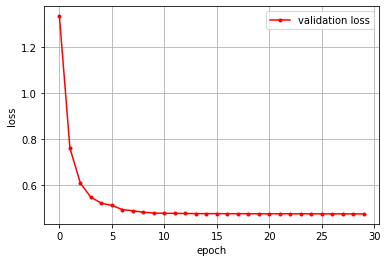

In [ ]:
x_len = np.arange(len(val_loss))
plt.plot(x_len, val_loss, marker='.', c="red", label='validation loss')
# plt.plot(x_len, loss, marker='.', c="blue", label='training loss')

plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()